In [7]:

import numpy as np
import pandas as pd
df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-08,337.299988,337.649994,334.440002,336.989990,334.191132,20897000
1,2021-11-09,337.109985,338.720001,334.529999,335.950012,333.159760,21307400
2,2021-11-10,334.570007,334.630005,329.920013,330.799988,328.052521,25500900
3,2021-11-11,331.250000,333.769989,330.510010,332.429993,329.669006,16849800
4,2021-11-12,333.920013,337.230011,333.790009,336.720001,333.923370,23831000
...,...,...,...,...,...,...,...
246,2022-10-31,233.759995,234.919998,231.149994,232.130005,232.130005,28357300
247,2022-11-01,234.600006,235.740005,227.330002,228.169998,228.169998,30592300
248,2022-11-02,229.460007,231.300003,220.039993,220.100006,220.100006,38407000
249,2022-11-03,220.089996,220.410004,213.979996,214.250000,214.250000,36633900


In [6]:
df = df[['Date', 'Close']]

df

NameError: name 'df' is not defined

In [3]:
df['Date']

NameError: name 'df' is not defined

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

NameError: name 'df' is not defined

In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18484\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2021-11-08
1     2021-11-09
2     2021-11-10
3     2021-11-11
4     2021-11-12
         ...    
246   2022-10-31
247   2022-11-01
248   2022-11-02
249   2022-11-03
250   2022-11-04
Name: Date, Length: 251, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2021-11-08,336.989990
2021-11-09,335.950012
2021-11-10,330.799988
2021-11-11,332.429993
2021-11-12,336.720001
...,...
2022-10-31,232.130005
2022-11-01,228.169998
2022-11-02,220.100006


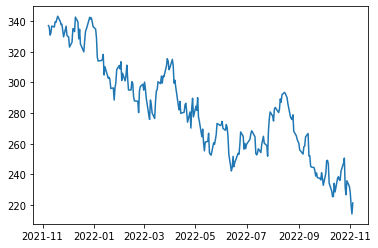

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2021-11-11', 
                                '2022-11-04', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-11-11,336.989990,335.950012,330.799988,332.429993
1,2021-11-12,335.950012,330.799988,332.429993,336.720001
2,2021-11-15,330.799988,332.429993,336.720001,336.070007
3,2021-11-16,332.429993,336.720001,336.070007,339.510010
4,2021-11-17,336.720001,336.070007,339.510010,339.119995
...,...,...,...,...,...
243,2022-10-31,231.320007,226.750000,235.869995,232.130005
244,2022-11-01,226.750000,235.869995,232.130005,228.169998
245,2022-11-02,235.869995,232.130005,228.169998,220.100006
246,2022-11-03,232.130005,228.169998,220.100006,214.250000


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

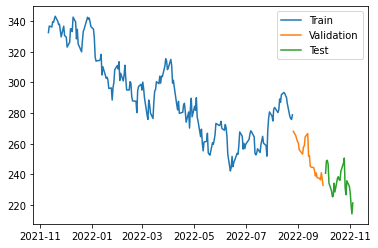

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 7s 283ms/step - loss: 85804.1016 - mean_absolute_error: 291.7017 - val_loss: 62530.4258 - val_mean_absolute_error: 249.8208
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 85592.4375 - mean_absolute_error: 291.3391 - val_loss: 62360.8008 - val_mean_absolute_error: 249.4811
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 85382.0234 - mean_absolute_error: 290.9773 - val_loss: 62170.8750 - val_mean_absolute_error: 249.1002
Epoch 4/100
7/7 [==============================] - 0s 39ms/step - loss: 85154.5469 - mean_absolute_error: 290.5861 - val_loss: 61957.6758 - val_mean_absolute_error: 248.6718
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 84894.1016 - mean_absolute_error: 290.1381 - val_loss: 61706.0547 - val_mean_absolute_error: 248.1652
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 84570.4062 - mean_absolute_error: 289.5791 - val_loss: 61

7/7 [==============================] - 1s 2ms/step


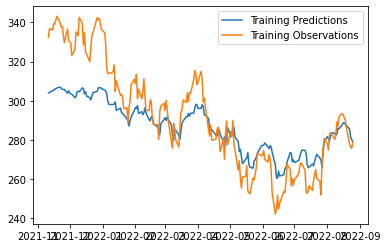

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 25ms/step


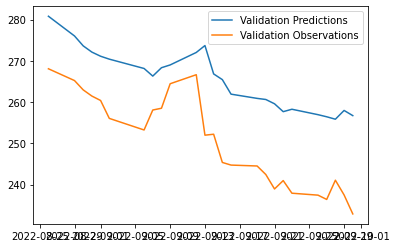

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 31ms/step


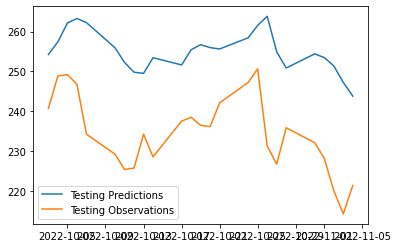

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

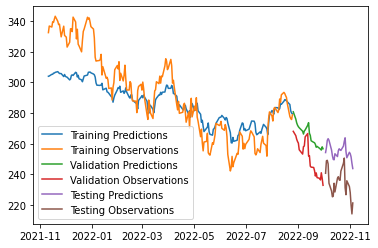

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [18]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 31ms/step


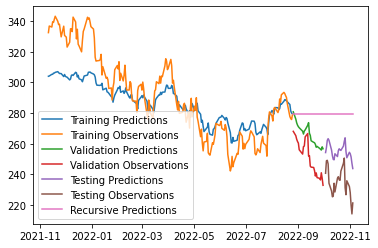

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])